<a href="https://colab.research.google.com/github/Roshni-seth/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

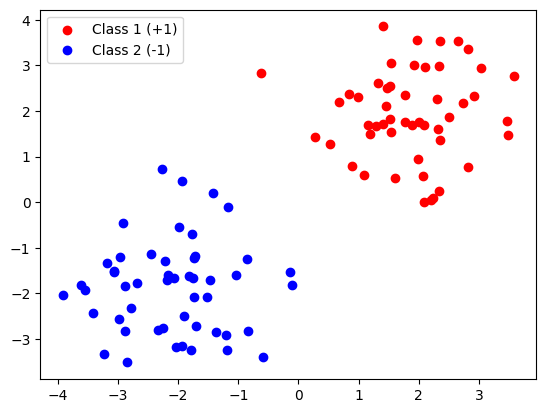

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dataset
np.random.seed(42)
class_1 = np.random.randn(50, 2) + np.array([2, 2])
class_2 = np.random.randn(50, 2) + np.array([-2, -2])

X = np.vstack((class_1, class_2))  # Combine both classes
y = np.hstack((np.ones(50), -1 * np.ones(50)))  # Labels: +1 for class_1, -1 for class_2

# Visualize the data
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1 (+1)')
plt.scatter(class_2[:, 0], class_2[:, 1], color='blue', label='Class 2 (-1)')
plt.legend()
plt.show()


In [ ]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # Regularization parameter
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # Initialize weights
        self.b = 0  # Initialize bias

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Correctly classified; minimize only the weight vector
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Misclassified; update both weight vector and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)  # Return +1 or -1 based on the sign

# Train the SVM
svm = SVM(learning_rate=0.0001, lambda_param=0.0001, n_iters=2000)
svm.fit(X, y)

# Predict
y_pred = svm.predict(X)


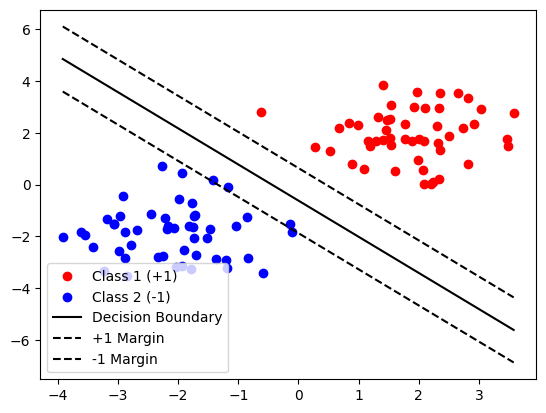

In [ ]:
# Define the decision boundary
def plot_decision_boundary(X, y, model):
    def decision_boundary(x, w, b, offset):
        # Equation of the line: w1 * x1 + w2 * x2 + b = offset
        return (-w[0] * x - b + offset) / w[1]

    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1 (+1)')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class 2 (-1)')

    # Plot decision boundary and margins
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    plt.plot(x_vals, decision_boundary(x_vals, model.w, model.b, 0), 'k-', label='Decision Boundary')
    plt.plot(x_vals, decision_boundary(x_vals, model.w, model.b, 1), 'k--', label='+1 Margin')
    plt.plot(x_vals, decision_boundary(x_vals, model.w, model.b, -1), 'k--', label='-1 Margin')

    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svm)
